In [1]:
!pip install --upgrade category_encoders
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d286f1b42ef02bfb04cedba3de14ef4d3811d308a9246a9714adbe126f384c9e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wor

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from random import randint,uniform
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

<ipython-input-2-9f120d892c49>:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


2. EDA

In [3]:
def summary(df):

    # Data Cleaning: dropna, fillna
    # Identify Null Values
    # Note: Data Preprocessing(StandardScaler/MinMaxScaler)
    #       & Impute Values (SimpleImputer) are covered in pipeline section

    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

def readfile(filepath):

    tempds = pd.read_csv(filepath)
    print(tempds.head())
    print(tempds.shape)

    # Call summary function to print
    print(summary(tempds))
    print('/n')
    tempds.drop(columns='PatientID', axis=1, inplace=True)
    print(tempds.shape)

    return tempds


In [4]:
train_url = 'train.csv'
test_url = 'test.csv'
sample_url = 'sample_submission.csv'

# First step to read train, test and sample files.
print('\n*** Training Data preprocessing summary ***')
train = readfile(train_url)
print('\n*** Test Data preprocessing summary ***')
test = readfile(test_url)
print('\n*** Sample Data preprocessing summary ***')
sample_submission = readfile(sample_url)

train.head()



*** Training Data preprocessing summary ***
   PatientID  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  \
0      42351       1         1          1   29       0       0         0   
1     135091       1         0          1   30       0       1         2   
2     201403       0         0          1   31       0       0         0   
3      72750       0         0          1   36       0       0         2   
4     133895       0         1          1   29       0       0         0   

   PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
0             1       1  ...            0        3         0         0   
1             0       0  ...            0        2         0         0   
2             1       1  ...            0        2         0         7   
3             0       0  ...            0        2         0         0   
4             1       1  ...            0        4         0         0   

   DiffWalk  Sex  Age  Education  Income  target  
0 

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,1,29,0,0,0,1,1,1,...,0,3,0,0,0,0,13,5,8,0
1,1,0,1,30,0,1,2,0,0,0,...,0,2,0,0,0,0,9,5,6,0
2,0,0,1,31,0,0,0,1,1,1,...,0,2,0,7,0,0,10,6,8,0
3,0,0,1,36,0,0,2,0,0,1,...,0,2,0,0,0,0,11,5,6,0
4,0,1,1,29,0,0,0,1,1,1,...,0,4,0,0,1,1,10,6,7,0


In [ ]:
train.value_counts()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  target
0       0         1          23   0       0       0         1             1       1        0                  1              0            1        0         0         0         0    6    6          8       0         40
                             21   0       0       0         1             1       1        0                  1              0            1        0         0         0         0    7    6          8       0         38
                             22   0       0       0         1             1       1        0                  1              0            1        0         0         0         0    6    6          8       0         37
                             21   0       0       0         1             1       1        0                  1              0    

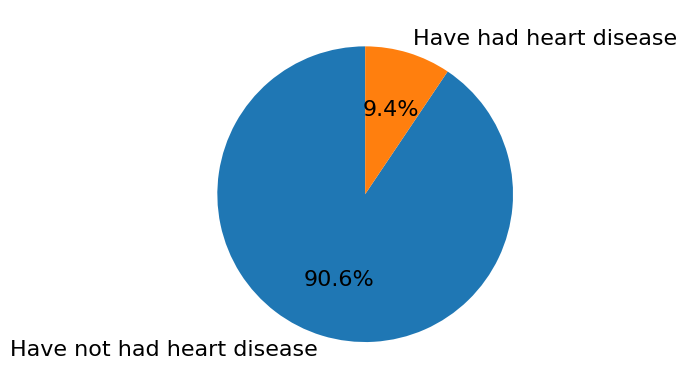

In [ ]:


presence_prop = pd.DataFrame(train['target'].value_counts(normalize=True))
presence_pct = presence_prop * 100
presence_pct = presence_pct.rename(index={0:'Have not had heart disease', 1: 'Have had heart disease'})
presence_pct

fig, ax = plt.subplots()

ax.pie(presence_pct['target'],
       labels=presence_pct.index,
       autopct='%1.1f%%',
       textprops={'fontsize': 16},
       startangle=90)
#Autopct causes the percents to be rounded. Startangle causes the starting place
#on the pie chart to be vertical

#ax.set_title('Heart Disease Health Indicators')
plt.show()

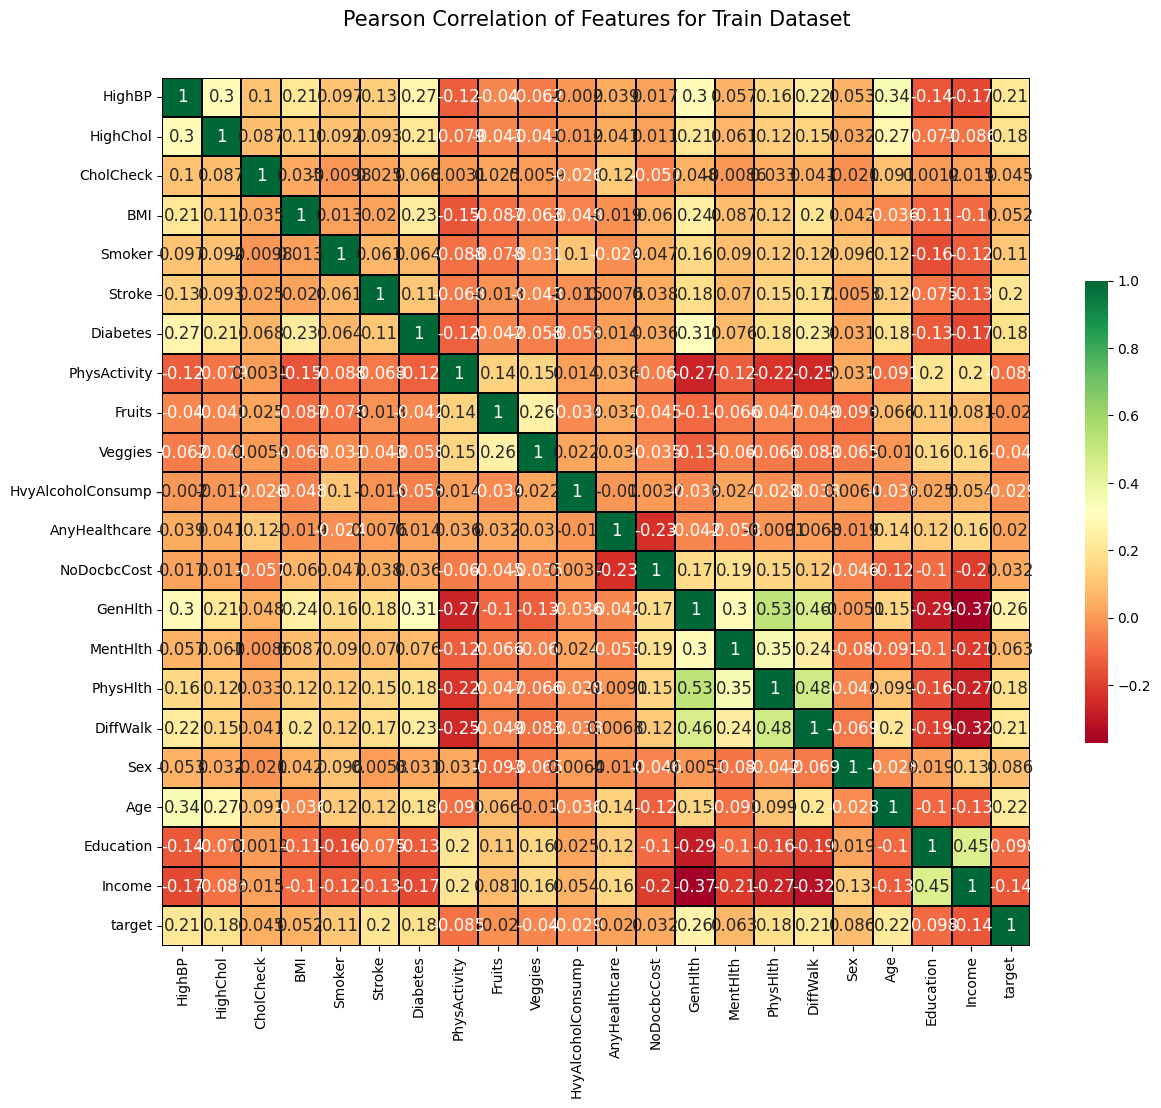

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = "RdYlGn", #cmap= 'PuBuGn',
        square=True,
        cbar_kws={'shrink':.5 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )

    plt.title('Pearson Correlation of Features for Train Dataset', y=1.05, size=15)

correlation_heatmap(train)

In [ ]:
train.target.value_counts()

0    160851
1     16725
Name: target, dtype: int64

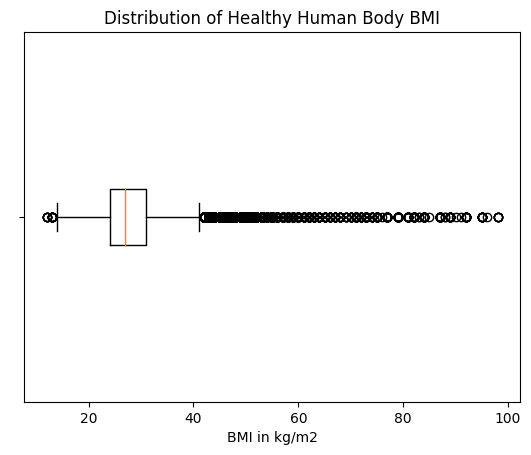

In [ ]:
fig, ax = plt.subplots()

ax.boxplot(train['BMI'],vert=False)

ax.set_xlabel('BMI in kg/m2')
ax.set_yticklabels(' ')
ax.set_title('Distribution of Healthy Human Body BMI')

plt.show()

In [ ]:
mean_BMI = train['BMI'].mean()
std_BMI = train['BMI'].std()
upper_end = mean_BMI + 3 * std_BMI
lower_end = mean_BMI - 3 * std_BMI
print(lower_end, upper_end)

8.644796478128008 48.115204873405986


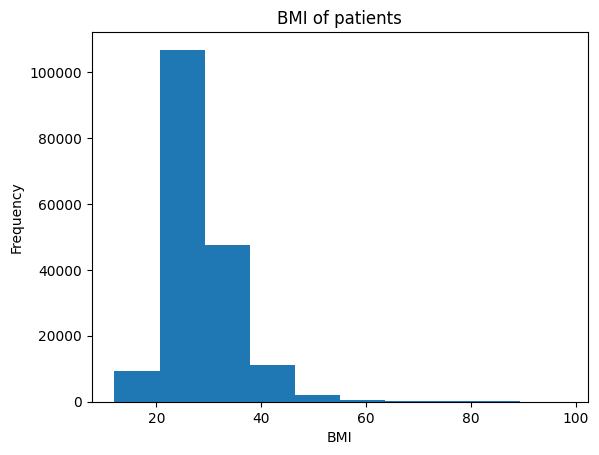

In [ ]:
fig, ax = plt.subplots()
ax.hist(train['BMI'])
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')
ax.set_title('BMI of patients')

plt.show()

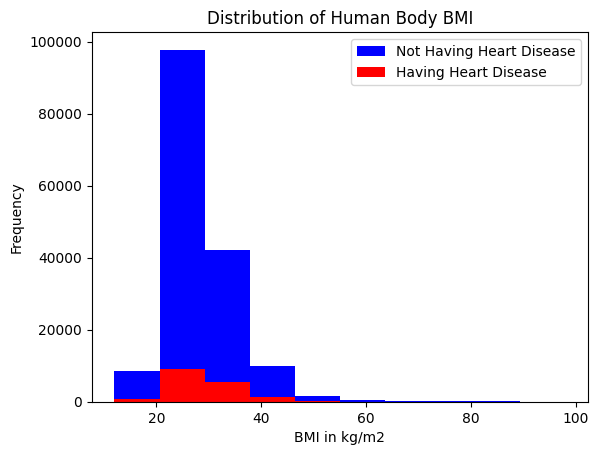

In [ ]:
train_hd = train[train['target'] == 1]
train_nhd = train[train['target'] == 0]

fig, ax = plt.subplots()

ax.hist(train_nhd['BMI'], label='Not Having Heart Disease', color='Blue')
ax.hist(train_hd['BMI'], label='Having Heart Disease', color='Red')

ax.set_xlabel('BMI in kg/m2')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Human Body BMI')

ax.legend()

plt.show()

In [ ]:


# Spliting source data into training and validation files using train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)
target = ['target']

# Feature and target column split
X_train, y_train = train.drop(columns=target), train[target]
X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(140148, 11) (140148, 1) (35037, 11) (35037, 1)


3. Model Building

In [ ]:

#build a pipeline for a Decision Tree, Random Forest and XGBoost
model_dt_oe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier())

model_dt_oe.fit(X_train, y_train)
dt_p = model_dt_oe.predict(X_val)
score_dt_oe = model_dt_oe.score(X_val, y_val)


In [ ]:

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=91)
    )
#fit on train
pipeline.fit(X_train, y_train)


#score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))


#predict on test
#y_pred= pipeline.predict(X_test)


Train Accuracy 0.9969308742784739
Val Accuracy 0.8487723842775087


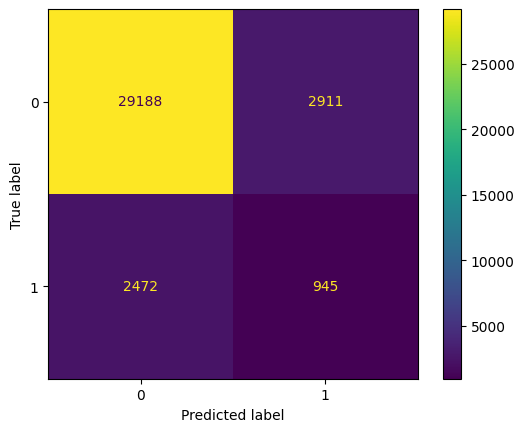

In [ ]:
cm = confusion_matrix(y_val, dt_p, labels=model_dt_oe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_dt_oe.classes_)
disp.plot()

plt.show()

In [ ]:
print(classification_report(y_val, dt_p))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     32099
           1       0.25      0.28      0.26      3417

    accuracy                           0.85     35516
   macro avg       0.58      0.59      0.59     35516
weighted avg       0.86      0.85      0.85     35516



In [ ]:
train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
43448,1,0,1,31,0,0,1,1,1,1,...,0,3,0,0,0,0,8,4,7,0
157993,0,0,1,29,0,0,0,0,1,1,...,0,3,1,7,1,0,8,5,2,0
137251,1,0,1,26,1,0,0,1,0,0,...,0,5,30,30,1,1,7,5,3,0
62554,0,0,1,26,0,0,0,1,1,1,...,0,1,3,5,0,0,1,4,8,0
134626,0,0,1,21,0,0,0,1,0,1,...,0,1,0,0,0,0,8,6,7,0


In [5]:
#train = train.loc[(train['BMI'] > 8) and (train['BMI'] < 48)]
train = train.loc[(train['BMI'] > 8) & (train['BMI'] < 48)]
train.shape

(175185, 22)

In [6]:
train['HealthyLS'] = train['Smoker'] + train['PhysActivity'] + train['Fruits'] + train['Veggies'] + train[ 'HvyAlcoholConsump']
train['PreCond'] = train['HighBP']+train['HighChol'] + train['CholCheck'] + train['Stroke'] + train['AnyHealthcare'] + train['NoDocbcCost'] + train['DiffWalk']
train = train.drop(columns=['Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','HighBP','HighChol','CholCheck','Stroke','AnyHealthcare','NoDocbcCost','DiffWalk'])


In [ ]:
train.head()

,BMI,Diabetes,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,target,HealthyLS,PreCond
43715,25,0,2,0,0,1,3,5,6,0,1,2
17188,32,0,2,0,3,0,12,6,6,0,1,2
51695,26,0,2,0,0,1,6,6,8,0,3,1
103573,30,0,2,0,0,1,11,6,8,0,3,3
148018,26,0,2,0,0,0,5,6,8,0,4,2


In [7]:


# Spliting source data into training and validation files using train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)
target = ['target']

# Feature and target column split
X_train, y_train = train.drop(columns=target), train[target]
X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(140148, 11) (140148, 1) (35037, 11) (35037, 1)


In [ ]:

#build a pipeline for a Decision Tree, Random Forest and XGBoost
model_dt_oe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=25))

model_dt_oe.fit(X_train, y_train)
dt_p = model_dt_oe.predict(X_val)
score_dt_oe = model_dt_oe.score(X_val, y_val)


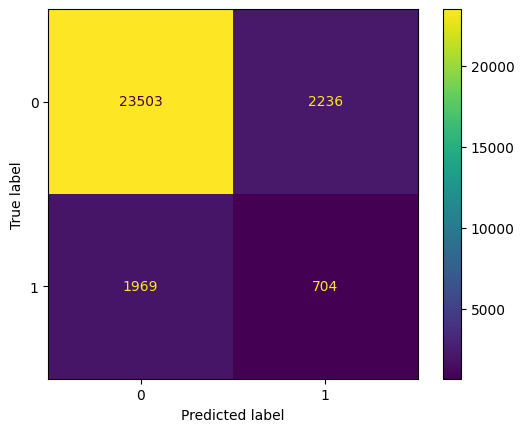

In [ ]:
cm = confusion_matrix(y_val, dt_p, labels=model_dt_oe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_dt_oe.classes_)
disp.plot()

plt.show()

In [ ]:
print(classification_report(y_val, dt_p))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     25739
           1       0.24      0.26      0.25      2673

    accuracy                           0.85     28412
   macro avg       0.58      0.59      0.58     28412
weighted avg       0.86      0.85      0.86     28412



In [ ]:
print('accracy score', accuracy_score(y_val, dt_p))

accracy score 0.8519991552864986


In [ ]:
#build a pipeline for a Decision Tree, Random Forest and XGBoost
model_dt_oh = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=25))

model_dt_oh.fit(X_train, y_train)
score_dt_oh = model_dt_oh.score(X_val, y_val)


In [ ]:

model_rf_oe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, bootstrap = True, oob_score =True, random_state=25))

model_rf_oe.fit(X_train, y_train)
score_rf_oe = model_rf_oe.score(X_val, y_val)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
model_rf_oh = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, bootstrap = True, oob_score =True, random_state=25))

model_rf_oh.fit(X_train, y_train)
score_rf_oh = model_rf_oh.score(X_val, y_val)



/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
model_xgb_oh = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier()
)
model_xgb_oh.fit(X_train, y_train)
xgb_hp = model_xgb_oh.predict(X_val)
score_xgb_oh = model_xgb_oh.score(X_val, y_val)
print('accracy score', accuracy_score(y_val, xgb_hp))

accracy score 0.9066543778801843


In [ ]:
X_train.head()

,BMI,Diabetes,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,HealthyLS,PreCond
16627,26,0,2,0,0,1,7,6,8,2,2
133096,33,0,1,0,0,1,4,5,3,3,2
123157,27,0,3,0,0,0,10,6,8,3,3
167431,31,0,3,0,0,0,8,6,6,2,2
83686,27,2,5,2,30,0,8,5,1,3,2


In [ ]:
model_xgb_oe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier()
)
model_xgb_oe.fit(X_train, y_train)
xgb_p = model_xgb_oe.predict(X_val)
score_xgb_oe = model_xgb_oe.score(X_val, y_val)
print('accracy score', accuracy_score(y_val, xgb_p))

accracy score 0.906528719229397


In [ ]:
print('RandomForest OneHot, Validation Accuracy', round((score_rf_oh*100),2))
print('RandomForest OrdinalEncoder, Validation Accuracy', round((score_rf_oe*100)),2)
print('Decision Tree OneHot, Validation Accuracy', round((score_dt_oh*100),2))
print('Decision Tree OrdinalEncoder, Validation Accuracy', round((score_dt_oe*100),2))
print('XGBoost OneHot , Validation Accuracy', round((score_xgb_oh*100),2))
print('XGBoost OrdinalEncoder , Validation Accuracy', round((score_xgb_oe*100),2))

RandomForest OneHot, Validation Accuracy 90.11
RandomForest OrdinalEncoder, Validation Accuracy 90 2
Decision Tree OneHot, Validation Accuracy 84.84
Decision Tree OrdinalEncoder, Validation Accuracy 84.84
XGBoost OneHot , Validation Accuracy 90.56
XGBoost OrdinalEncoder , Validation Accuracy 90.56


In [ ]:
k = 3
scores_rf = cross_val_score(model_rf_oe, X_train, y_train, cv=k,
                         scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
k = 3
scores_dt = cross_val_score(model_dt_oe, X_train, y_train, cv=k,
                         scoring='accuracy')


In [ ]:
k = 3
scores_xgb = cross_val_score(model_xgb_oe, X_train, y_train, cv=k,
                         scoring='accuracy')


In [ ]:
print(f'RandomForest Accuracy for {k} folds:', np.round((scores_rf*100),2))
print(f'DecisionTree Accuracy for {k} folds:', np.round((scores_dt*100),2))
print(f'XGBoost Accuracy for {k} folds:', np.round((scores_xgb*100),2))

RandomForest Accuracy for 3 folds: [90.42 90.44 90.39]
DecisionTree Accuracy for 3 folds: [85.19 84.99 85.04]
XGBoost Accuracy for 3 folds: [90.65 90.7  90.58]


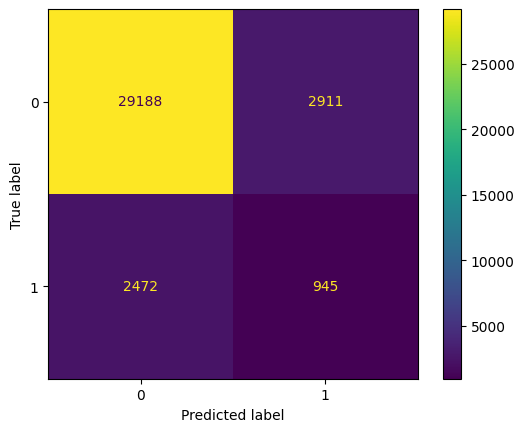

In [ ]:
cm = confusion_matrix(y_val, dt_p, labels=model_dt_oe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_dt_oe.classes_)
disp.plot()

plt.show()

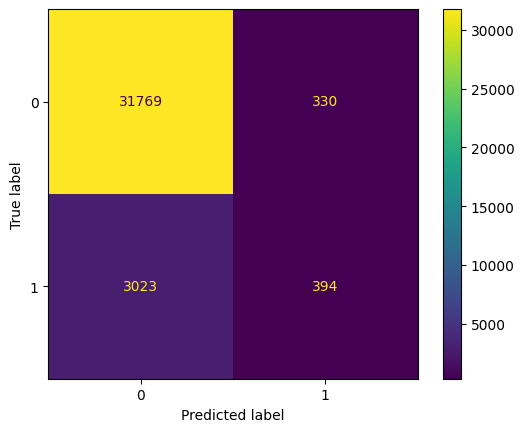

In [ ]:
cm = confusion_matrix(y_val, xgb_p, labels=model_xgb_oe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_xgb_oe.classes_)
disp.plot()

plt.show()

In [ ]:
model_rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(random_state=25))

In [ ]:
# Param for RandomizedSearchCV
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__n_estimators': [20,50,100],
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': [3],
}

# Hyperparameter tuning using RandomizedSearchCV
rf_rscv = RandomizedSearchCV(
    model_rf,
    param_distributions=param_distributions,
    n_iter=3,
    cv=3,
    scoring="accuracy",
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

rf_rscv.fit(X_train, y_train);

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
print('RandomizedSearchCV Accuracy', np.round((rf_rscv.best_score_*100),2))
print('RandomizedSearchCV Best hyperparameters')
print(rf_rscv.best_params_)

RandomizedSearchCV Accuracy 90.71
RandomizedSearchCV Best hyperparameters
{'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': 15}


In [ ]:
# Param for GridSearchCV
param_distributions = {
      'simpleimputer__strategy': ['mean', 'median','mode'],
    'randomforestclassifier__n_estimators': [20,50,100],
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': [5],
}

# Hyperparameter tuning using GridSearchCV
rf_gscv = GridSearchCV(
    model_rf,
    param_grid =param_distributions,
    n_jobs =3,
    cv=None,
    scoring='accuracy',
    verbose=10,
    return_train_score=True, )

rf_gscv.fit(X_train, y_train);


Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pa

In [ ]:
print('GridSearchCV Accuracy', np.round((rf_gscv.best_score_*100),2))
print('GridSearchCV Best hyperparameters')
print(rf_gscv.best_params_)
print('\n')
print('RandomizedSearchCV Accuracy', np.round((rf_rscv.best_score_*100),2))
print('RandomizedSearchCV Best hyperparameters')
print(rf_rscv.best_params_)

GridSearchCV Accuracy 90.78
GridSearchCV Best hyperparameters
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'mean'}


RandomizedSearchCV Accuracy 90.48
RandomizedSearchCV Best hyperparameters
{'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': 15}


In [8]:
model_xgb_f = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier()
)

In [ ]:
# Param for RandomizedSearchCV
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbclassifier__learning_rate': [0.05, 0.10],
    'xgbclassifier__max_depth': [3, 4, 5],
    'xgbclassifier__min_child_weight': [1,3,5],
    'xgbclassifier__gamma': [0.0, 0.1, 0.2],
}

# Hyperparameter tuning using RandomizedSearchCV
xf_rscv = RandomizedSearchCV(
    model_xgb_f,
    param_distributions=param_distributions,
    n_iter=3,
    cv=3,
    scoring="accuracy",
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

xf_rscv.fit(X_train, y_train);

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [ ]:
print('RandomizedSearchCV Accuracy', np.round((xf_rscv.best_score_*100),2))
print('RandomizedSearchCV Best hyperparameters')
print(xf_rscv.best_params_)

RandomizedSearchCV Accuracy 90.82
RandomizedSearchCV Best hyperparameters
{'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.2, 'simpleimputer__strategy': 'median'}


In [9]:
# Param for GridSearchCV
param_distributions = {
      'simpleimputer__strategy': ['mean', 'median','mode'],
    'xgbclassifier__learning_rate': [0.05, 0.10],
    'xgbclassifier__max_depth': [3, 4, 5],
    'xgbclassifier__min_child_weight': [1,3,5],
    'xgbclassifier__gamma': [0.0, 0.1, 0.2],
}

# Hyperparameter tuning using GridSearchCV
xf_gscv = GridSearchCV(
    model_xgb_f,
    param_grid =param_distributions,
    n_jobs =3,
    cv=None,
    scoring='accuracy',
    verbose=10,
    return_train_score=True, )

xf_gscv.fit(X_train, y_train);

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
136 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-

In [10]:
print('GridSearchCV Accuracy', np.round((xf_gscv.best_score_*100),2))
print('GridSearchCV Best hyperparameters')
print(xf_gscv.best_params_)

GridSearchCV Accuracy 90.83
GridSearchCV Best hyperparameters
{'simpleimputer__strategy': 'mean', 'xgbclassifier__gamma': 0.2, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 3}


In [ ]:
xgb_p = xf_gscv.predict(X_val)

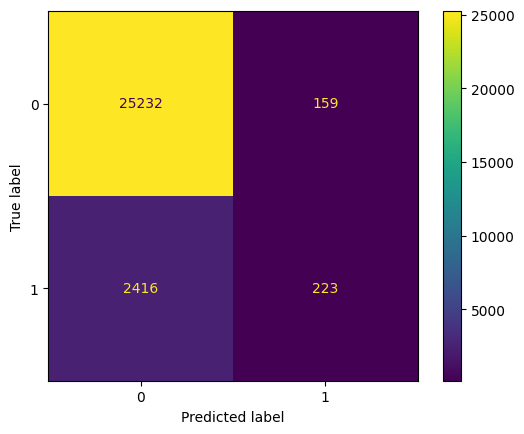

In [ ]:
cm = confusion_matrix(y_val, xgb_p, labels=xf_gscv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xf_gscv.classes_)
disp.plot()

plt.show()

In [ ]:
print(classification_report(y_val, xgb_p))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25391
           1       0.58      0.08      0.15      2639

    accuracy                           0.91     28030
   macro avg       0.75      0.54      0.55     28030
weighted avg       0.88      0.91      0.88     28030



Text(0.5, 1.0, 'top 15 feature importances')

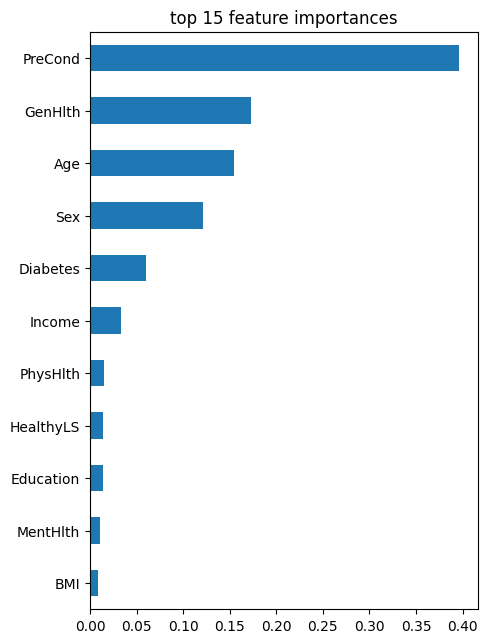

In [ ]:
rf = xf_gscv.best_estimator_.named_steps['xgbclassifier']
encoder = xf_gscv.best_estimator_.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(rf.feature_importances_, encoded_columns)

n=15
plt.figure(figsize=(5,n/2))
importances.sort_values()[-n:].plot.barh();
plt.title(f'top {n} feature importances')

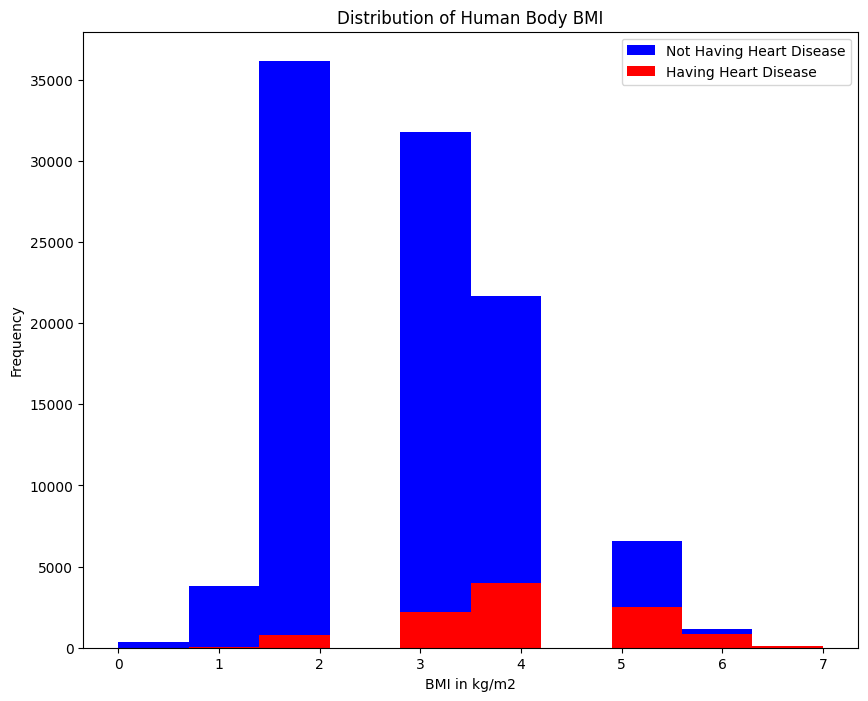

In [ ]:
train_hd = train[train['target'] == 1]
train_nhd = train[train['target'] == 0]

fig, ax = plt.subplots()

ax.hist(train_nhd['PreCond'], label='Not Having Heart Disease', color='Blue')
ax.hist(train_hd['PreCond'], label='Having Heart Disease', color='Red')

ax.set_xlabel('BMI in kg/m2')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Human Body BMI')

ax.legend()

plt.show()

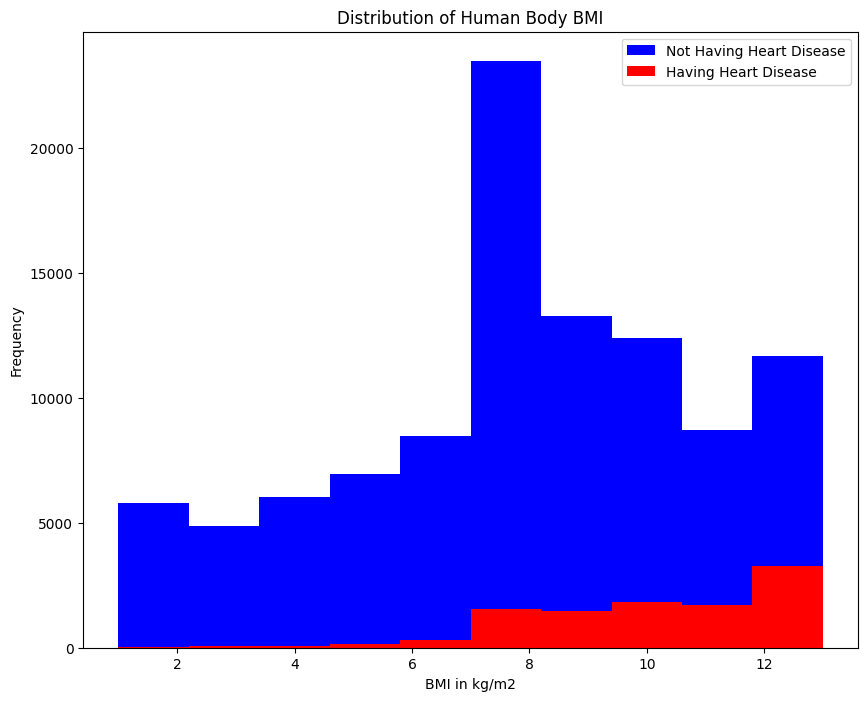

In [ ]:
fig, ax = plt.subplots()

ax.hist(train_nhd['Age'], label='Not Having Heart Disease', color='Blue')
ax.hist(train_hd['Age'], label='Having Heart Disease', color='Red')

ax.set_xlabel('BMI in kg/m2')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Human Body BMI')

ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-69-0a677643d41a>:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

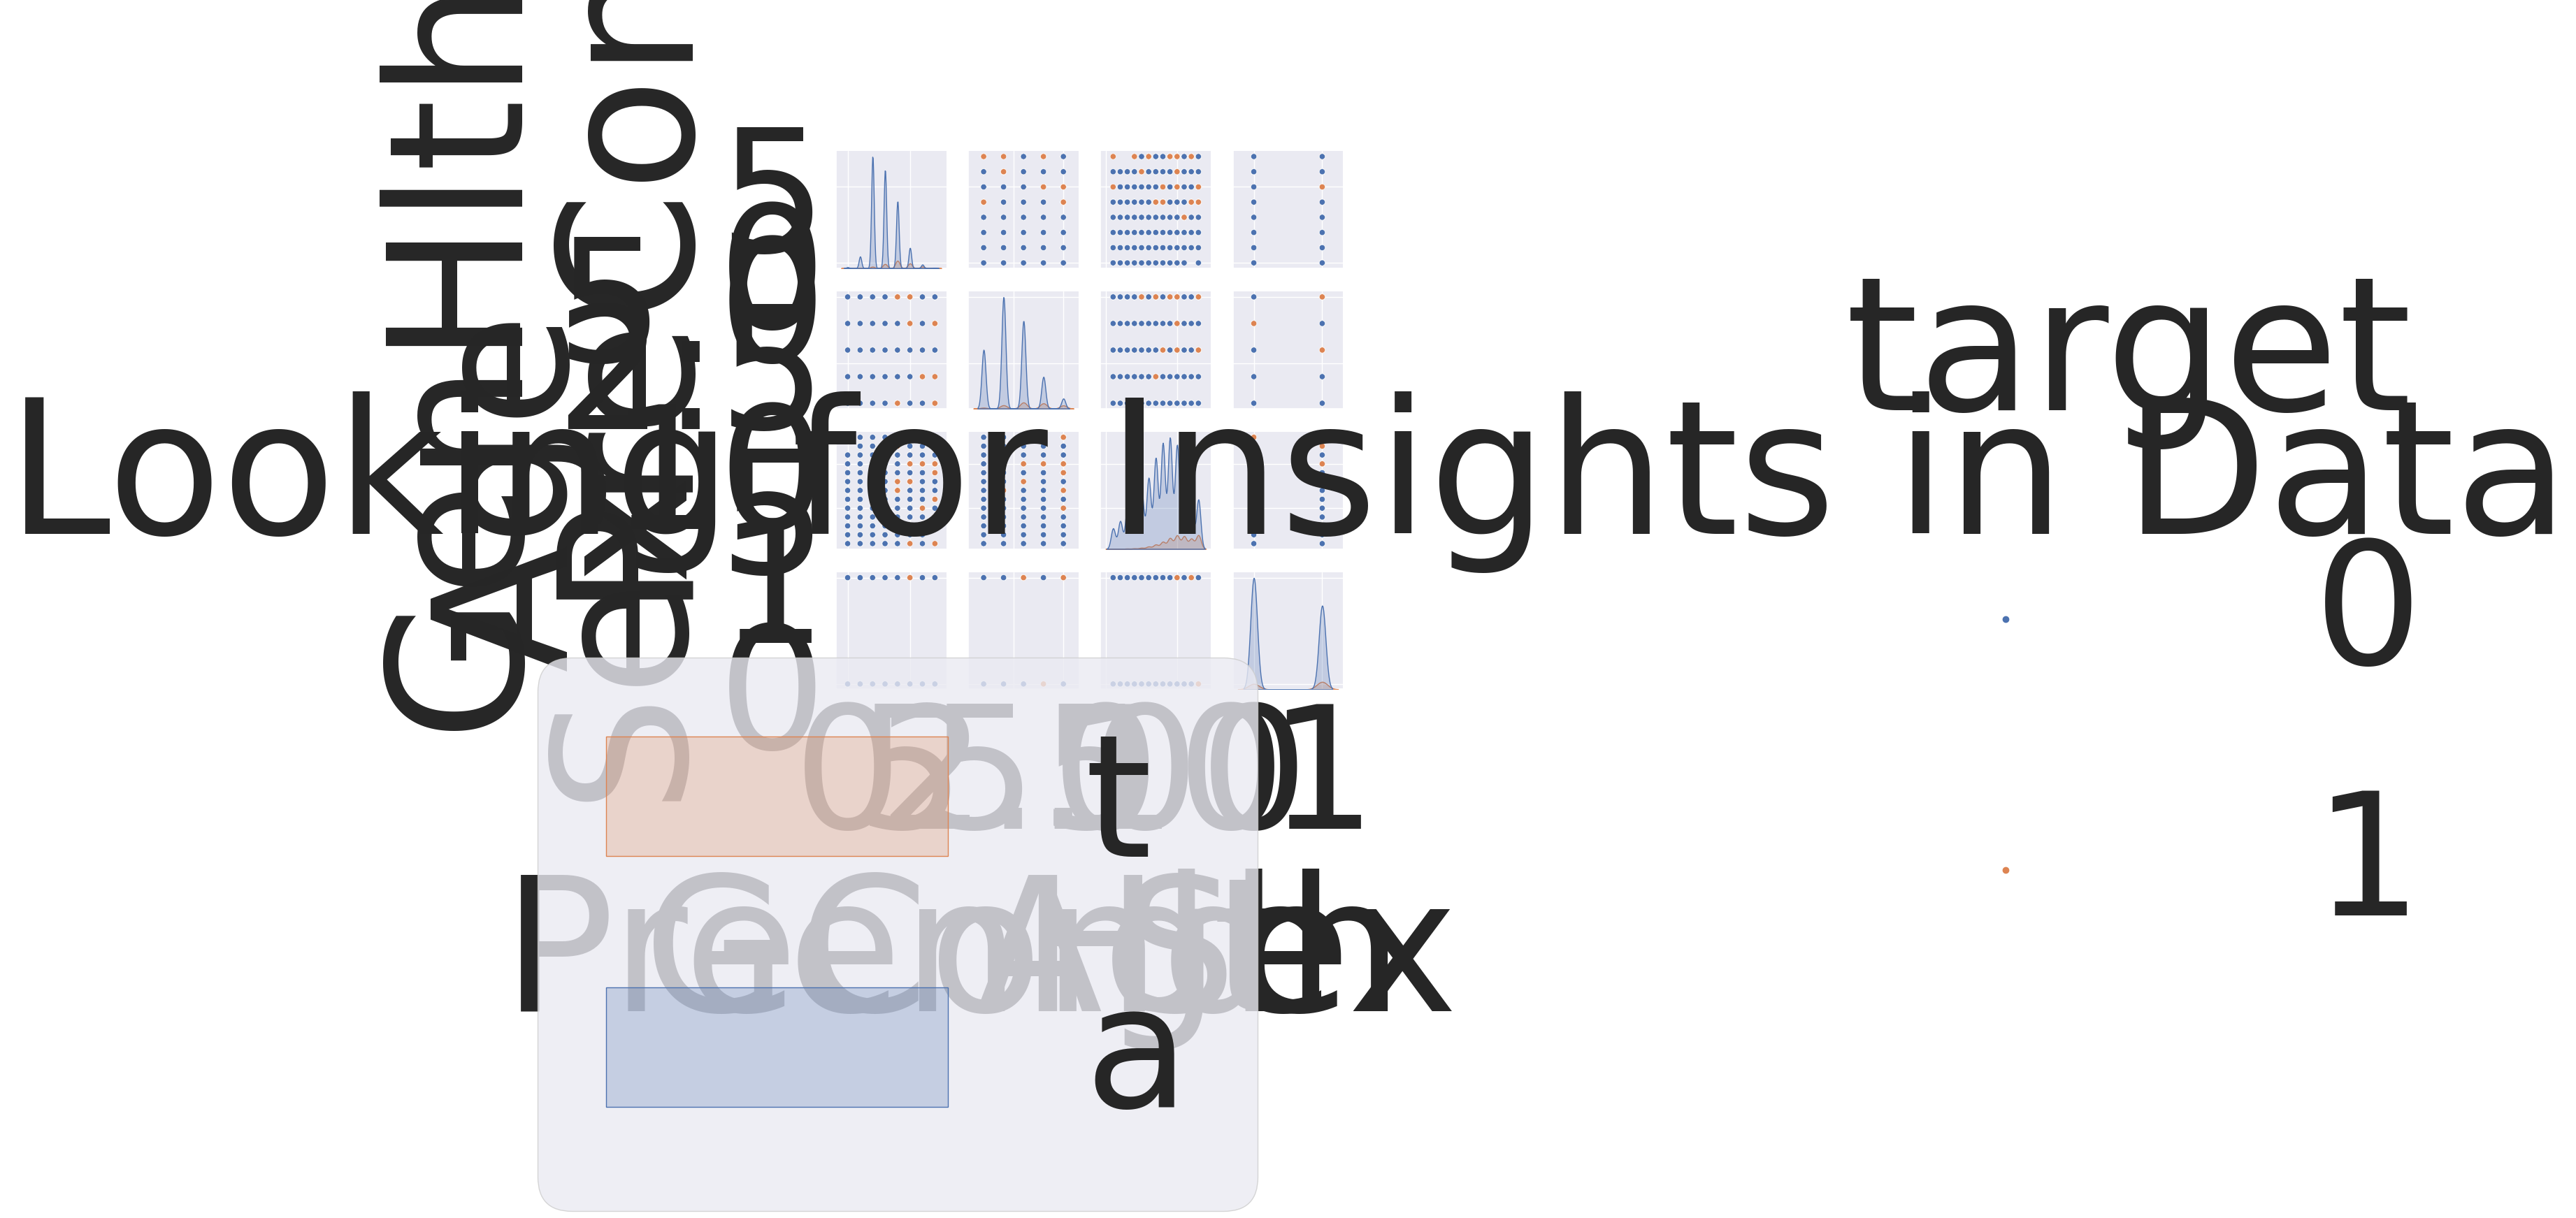

In [ ]:
train2 = train[['PreCond', 'target', 'GenHlth', 'Age', 'Sex' ]]
plt.figure(figsize=(12,10))
sns.pairplot(train2, hue='target')
plt.title("Looking for Insights in Data")
plt.legend("target")
plt.tight_layout()
plt.plot()
plt.show()

In [ ]:
y_pred = xf_gscv.predict(X_val)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
sample_submission.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,20,1,0,0,0,0,0,...,0,0,3,0,0,0,1,6,4,6
1,0,1,1,28,1,0,0,1,0,1,...,1,0,1,0,0,0,1,9,6,8
2,1,1,1,29,0,0,1,1,1,1,...,1,1,4,15,2,0,1,7,6,8
3,0,1,1,28,0,0,0,1,0,1,...,1,0,2,0,0,0,0,10,5,7
4,0,1,1,32,1,0,0,1,0,0,...,1,0,3,1,10,0,1,9,5,6


In [11]:
test=pd.read_csv('test.csv')
test['HealthyLS'] = test['Smoker'] + test['PhysActivity'] + test['Fruits'] + test['Veggies'] + test[ 'HvyAlcoholConsump']
test['PreCond'] = test['HighChol'] + test['CholCheck'] + test['Stroke'] + test['AnyHealthcare'] + test['NoDocbcCost'] + test['DiffWalk']+ test['HighBP']
test = test.drop(columns=['PatientID','Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','HighBP','HighChol','CholCheck','Stroke','AnyHealthcare','NoDocbcCost','DiffWalk'])

In [ ]:
test.head()

,BMI,Diabetes,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,HealthyLS,PreCond
0,20,0,3,0,0,1,6,4,6,1,1
1,28,0,1,0,0,1,9,6,8,3,3
2,29,1,4,15,2,1,7,6,8,3,4
3,28,0,2,0,0,0,10,5,7,2,3
4,32,0,3,1,10,1,9,5,6,2,3


In [12]:
test1=pd.read_csv('test.csv')
test1.head()

,PatientID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,222135,0,1,0,20,1,0,0,0,0,...,0,0,3,0,0,0,1,6,4,6
1,66531,0,1,1,28,1,0,0,1,0,...,1,0,1,0,0,0,1,9,6,8
2,212920,1,1,1,29,0,0,1,1,1,...,1,1,4,15,2,0,1,7,6,8
3,11402,0,1,1,28,0,0,0,1,0,...,1,0,2,0,0,0,0,10,5,7
4,136077,0,1,1,32,1,0,0,1,0,...,1,0,3,1,10,0,1,9,5,6


In [14]:
y_pred = xf_gscv.predict(test)
y_pred_f = pd.DataFrame({'PatientID': test1['PatientID'], 'target': y_pred})
y_pred_f.head()
y_pred_f.to_csv('submission.csv', index=False)

In [16]:
y_pred_f.shape


(76104, 2)

In [17]:
y_pred_f.head()

,PatientID,target
0,222135,0
1,66531,0
2,212920,0
3,11402,0
4,136077,0
